In [40]:
import cv2
import numpy as np

# Cargar las imágenes usando OpenCV
I0 = cv2.imread('pictures/c/1.png', cv2.IMREAD_GRAYSCALE)
I1 = cv2.imread('pictures/c/2.png', cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread('pictures/c/3.png', cv2.IMREAD_GRAYSCALE)
I3 = cv2.imread('pictures/c/4-03.png', cv2.IMREAD_GRAYSCALE)

# I0 = cv2.imread('pictures/S0.png', cv2.IMREAD_GRAYSCALE)
# I1 = cv2.imread('pictures/S1.png', cv2.IMREAD_GRAYSCALE)
# I2 = cv2.imread('pictures/S2.png', cv2.IMREAD_GRAYSCALE)
# I3 = cv2.imread('pictures/S3.png', cv2.IMREAD_GRAYSCALE)

#Verificar si las imágenes se cargaron correctamente
if I0 is None or I1 is None or I2 is None or I3 is None:
    print("Error al cargar las imágenes.")
else:
    # Convertir a tipo float para realizar cálculos
    I0 = I0.astype(float)
    I1 = I1.astype(float)
    I2 = I2.astype(float)
    I3 = I3.astype(float)

In [41]:
# Calcular los valores de delta y fi
swing = np.deg2rad(45)
filas, columnas = I0.shape
matriz_delta = np.zeros((filas, columnas))
matriz_fi = np.zeros((filas, columnas))

for fila in range(filas):
    for columna in range(columnas):
        I_0a = I0[fila, columna]
        I_1a = I1[fila, columna]
        I_2a = I2[fila, columna]
        I_3a = I3[fila, columna]

        #A1 = I_1a - I_2a
        #B1 = I_1a + I_2a - 2 * I_3a
        den = I_1a + I_2a - 2 * I_0a

        A = ((I_1a - I_2a)/ den) * np.tan(swing / 2)
        B = ((I_1a + I_2a - 2 * I_3a)/ den) * np.tan(swing / 2)
        C = I_1a + I_2a - 2 * I_0a

        if C >= 0:
            delta = np.arctan(np.sqrt(A**2 + B**2))
        else:
            delta = np.pi - np.arctan(np.sqrt(A**2 + B**2))

        # if C >= 0:
        #     delta = np.degrees(np.arctan(np.radians(np.sqrt(A**2 + B**2))))
        # else:
        #     delta = np.degrees(np.pi - np.arctan(np.radians(np.sqrt(A**2 + B**2))))

        fi = 0.5 * np.arctan(A / B)

        matriz_delta[fila, columna] = np.degrees(delta)
        matriz_fi[fila, columna] = np.degrees(fi)

/var/folders/g7/zshjt3y94452nhv5tg0kwvk80000gn/T/ipykernel_18140/2366817881.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  fi = 0.5 * np.arctan(A / B)
/var/folders/g7/zshjt3y94452nhv5tg0kwvk80000gn/T/ipykernel_18140/2366817881.py:18: RuntimeWarning: divide by zero encountered in scalar divide
  A = ((I_1a - I_2a)/ den) * np.tan(swing / 2)
/var/folders/g7/zshjt3y94452nhv5tg0kwvk80000gn/T/ipykernel_18140/2366817881.py:19: RuntimeWarning: invalid value encountered in scalar divide
  B = ((I_1a + I_2a - 2 * I_3a)/ den) * np.tan(swing / 2)
/var/folders/g7/zshjt3y94452nhv5tg0kwvk80000gn/T/ipykernel_18140/2366817881.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  B = ((I_1a + I_2a - 2 * I_3a)/ den) * np.tan(swing / 2)
/var/folders/g7/zshjt3y94452nhv5tg0kwvk80000gn/T/ipykernel_18140/2366817881.py:32: RuntimeWarning: invalid value encountered in scalar divide
  fi = 0.5 * np.arctan(A / B)
/var/folders/g7/zshjt3y94452nhv5tg0kwvk80000gn/T/ipykernel_18140

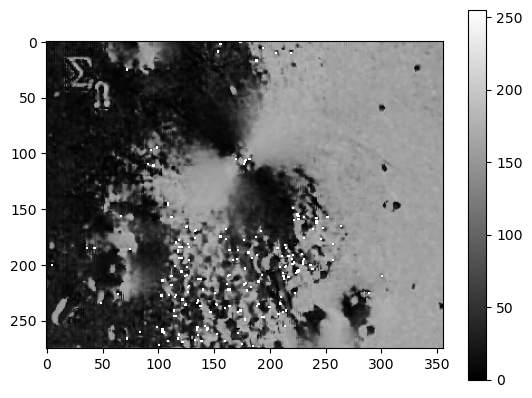

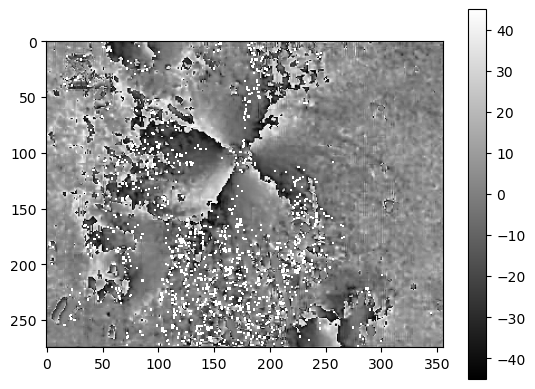

In [42]:
import matplotlib.pyplot as plt

# Visualizar matriz_delta
plt.figure()
plt.imshow(matriz_delta, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.show()

# Visualizar matriz_fi
plt.figure()
plt.imshow(matriz_fi, cmap='gray')
plt.colorbar()
plt.show()